<a href="https://colab.research.google.com/github/KimYooBin1/daily_coding/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D/%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#텐서플로 프로그래밍 : 퍼셉트론 학습

import tensorflow as tf

#OR 데이터 구축
x=[[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

#가중치 초기화
w = tf.Variable(tf.random.uniform([2,1],-0.5,0.5))             #random.uniform([배열형태],범위)
b = tf.Variable(tf.zeros([1]))

#옵티마이저
opt=tf.keras.optimizers.Adam(learning_rate=0.1)

#전방 계산식
def forward():
  s=tf.add(tf.matmul(x,w),b)
  o=tf.tanh(s)
  return o

#손실 함수 정의
def loss():
  o=forward()
  return tf.reduce_mean((y-o)**2)

#500세대까지 학습(100세대마다 학습 정보 출력)
for i in range(500):
  opt.minimize(loss, var_list=[w,b])                          #opt.minimize(손실함수, 수정하는 가중치값)
  if(i%100==0): print('loss at epoch',i,'=',loss().numpy())   #loss().numpy() 넘파이 배열로 값 리턴

#학습된 퍼셉트론으로 OR 데이터를 예측
o=forward()
print(o)

loss at epoch 0 = 1.0994741
loss at epoch 100 = 0.015516841
loss at epoch 200 = 0.005710939
loss at epoch 300 = 0.0031138677
loss at epoch 400 = 0.0020045063
tf.Tensor(
[[-0.94278926]
 [ 0.9648395 ]
 [ 0.96576214]
 [ 0.9999816 ]], shape=(4, 1), dtype=float32)


In [2]:
#케라스 프로그래밍: 퍼셉트론 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

#OR 데이터 구축
x=[[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

n_input=2
n_output=1

perceptron=Sequential()
perceptron.add(Dense(units=n_output, activation='tanh', input_shape=(n_input,),kernel_initializer='random_uniform', bias_initializer='zeros'))

perceptron.compile(loss='mse', optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 1s - loss: 1.0686 - mse: 1.0686 - 749ms/epoch - 749ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7885 - mse: 0.7885 - 35ms/epoch - 35ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6630 - mse: 0.6630 - 28ms/epoch - 28ms/step
Epoch 4/500
1/1 - 0s - loss: 0.6033 - mse: 0.6033 - 24ms/epoch - 24ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5684 - mse: 0.5684 - 31ms/epoch - 31ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5438 - mse: 0.5438 - 24ms/epoch - 24ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5244 - mse: 0.5244 - 7ms/epoch - 7ms/step
Epoch 8/500
1/1 - 0s - loss: 0.5076 - mse: 0.5076 - 10ms/epoch - 10ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4924 - mse: 0.4924 - 34ms/epoch - 34ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4783 - mse: 0.4783 - 9ms/epoch - 9ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4649 - mse: 0.4649 - 20ms/epoch - 20ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4521 - mse: 0.4521 - 9ms/epoch - 9ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4398 - mse: 0.4398 - 15ms/epoch - 15ms/step
Epoch 14/500
1/1 - 0s - l

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input = 784
n_hidden = 1024
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden, activation = 'tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist=mlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)            #batch_size: size만큼 지난후 가중치 갱신 validation_data: 테스트 집합 검증

res=mlp.evaluate(x_test, y_test, verbose=0)
print("정확률은",res[1]*100)

Epoch 1/30
469/469 - 7s - loss: 0.0430 - accuracy: 0.8411 - val_loss: 0.0285 - val_accuracy: 0.9094 - 7s/epoch - 15ms/step
Epoch 2/30
469/469 - 6s - loss: 0.0227 - accuracy: 0.9287 - val_loss: 0.0180 - val_accuracy: 0.9424 - 6s/epoch - 12ms/step
Epoch 3/30
469/469 - 6s - loss: 0.0166 - accuracy: 0.9481 - val_loss: 0.0150 - val_accuracy: 0.9516 - 6s/epoch - 12ms/step
Epoch 4/30
469/469 - 6s - loss: 0.0139 - accuracy: 0.9567 - val_loss: 0.0135 - val_accuracy: 0.9584 - 6s/epoch - 12ms/step
Epoch 5/30
469/469 - 6s - loss: 0.0120 - accuracy: 0.9635 - val_loss: 0.0122 - val_accuracy: 0.9626 - 6s/epoch - 13ms/step
Epoch 6/30
469/469 - 6s - loss: 0.0108 - accuracy: 0.9681 - val_loss: 0.0108 - val_accuracy: 0.9649 - 6s/epoch - 12ms/step
Epoch 7/30
469/469 - 6s - loss: 0.0101 - accuracy: 0.9707 - val_loss: 0.0099 - val_accuracy: 0.9665 - 6s/epoch - 12ms/step
Epoch 8/30
469/469 - 6s - loss: 0.0093 - accuracy: 0.9736 - val_loss: 0.0096 - val_accuracy: 0.9691 - 6s/epoch - 12ms/step
Epoch 9/30
469/4

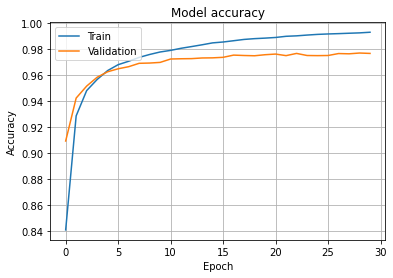

In [9]:
import matplotlib.pyplot as plt

#정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

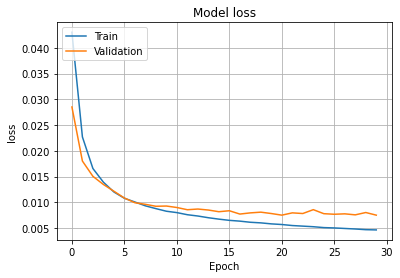

In [12]:
#손실함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = y_train.astype(np.float32)/255.0
x_test = y_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input = 784
n_hidden = 1024
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden, activation='tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist=mlp.fit(x_train, y_train, batch_size=128, epochs= 30, validation_data=(x_test, y_test), verbose=2)

res=mlp.evaluate(x_test, y_test, verbose=0)
print("정확률은",res[1]*100)

Epoch 1/30


ValueError: ignored